# **Phase 1: Setting the Context (Months 1-3)**

1. PROBLEM STATEMENT


First few rows of the dataset:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2016               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2017               July   
4  Resort Hotel            0         14               2016               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights meal  ...  \
0                        0                     0   BB  ...   
1        

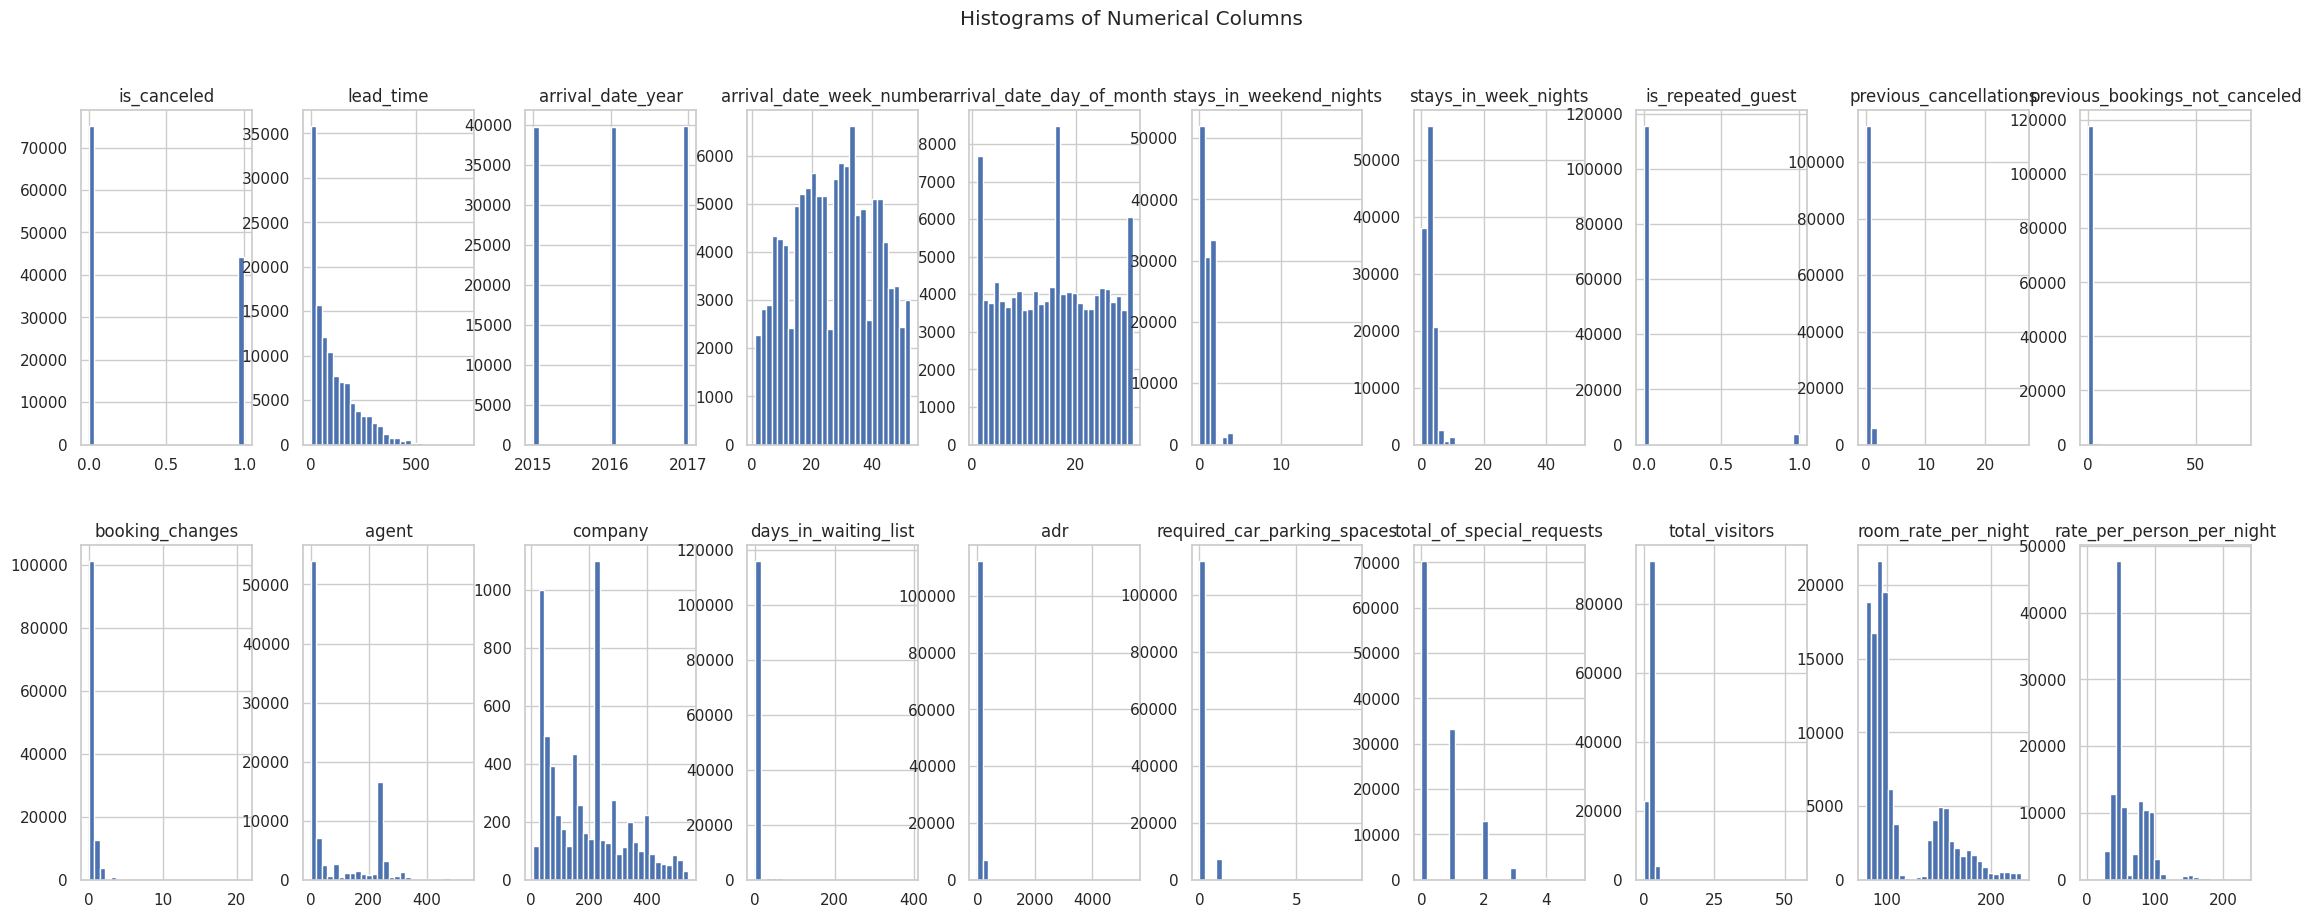

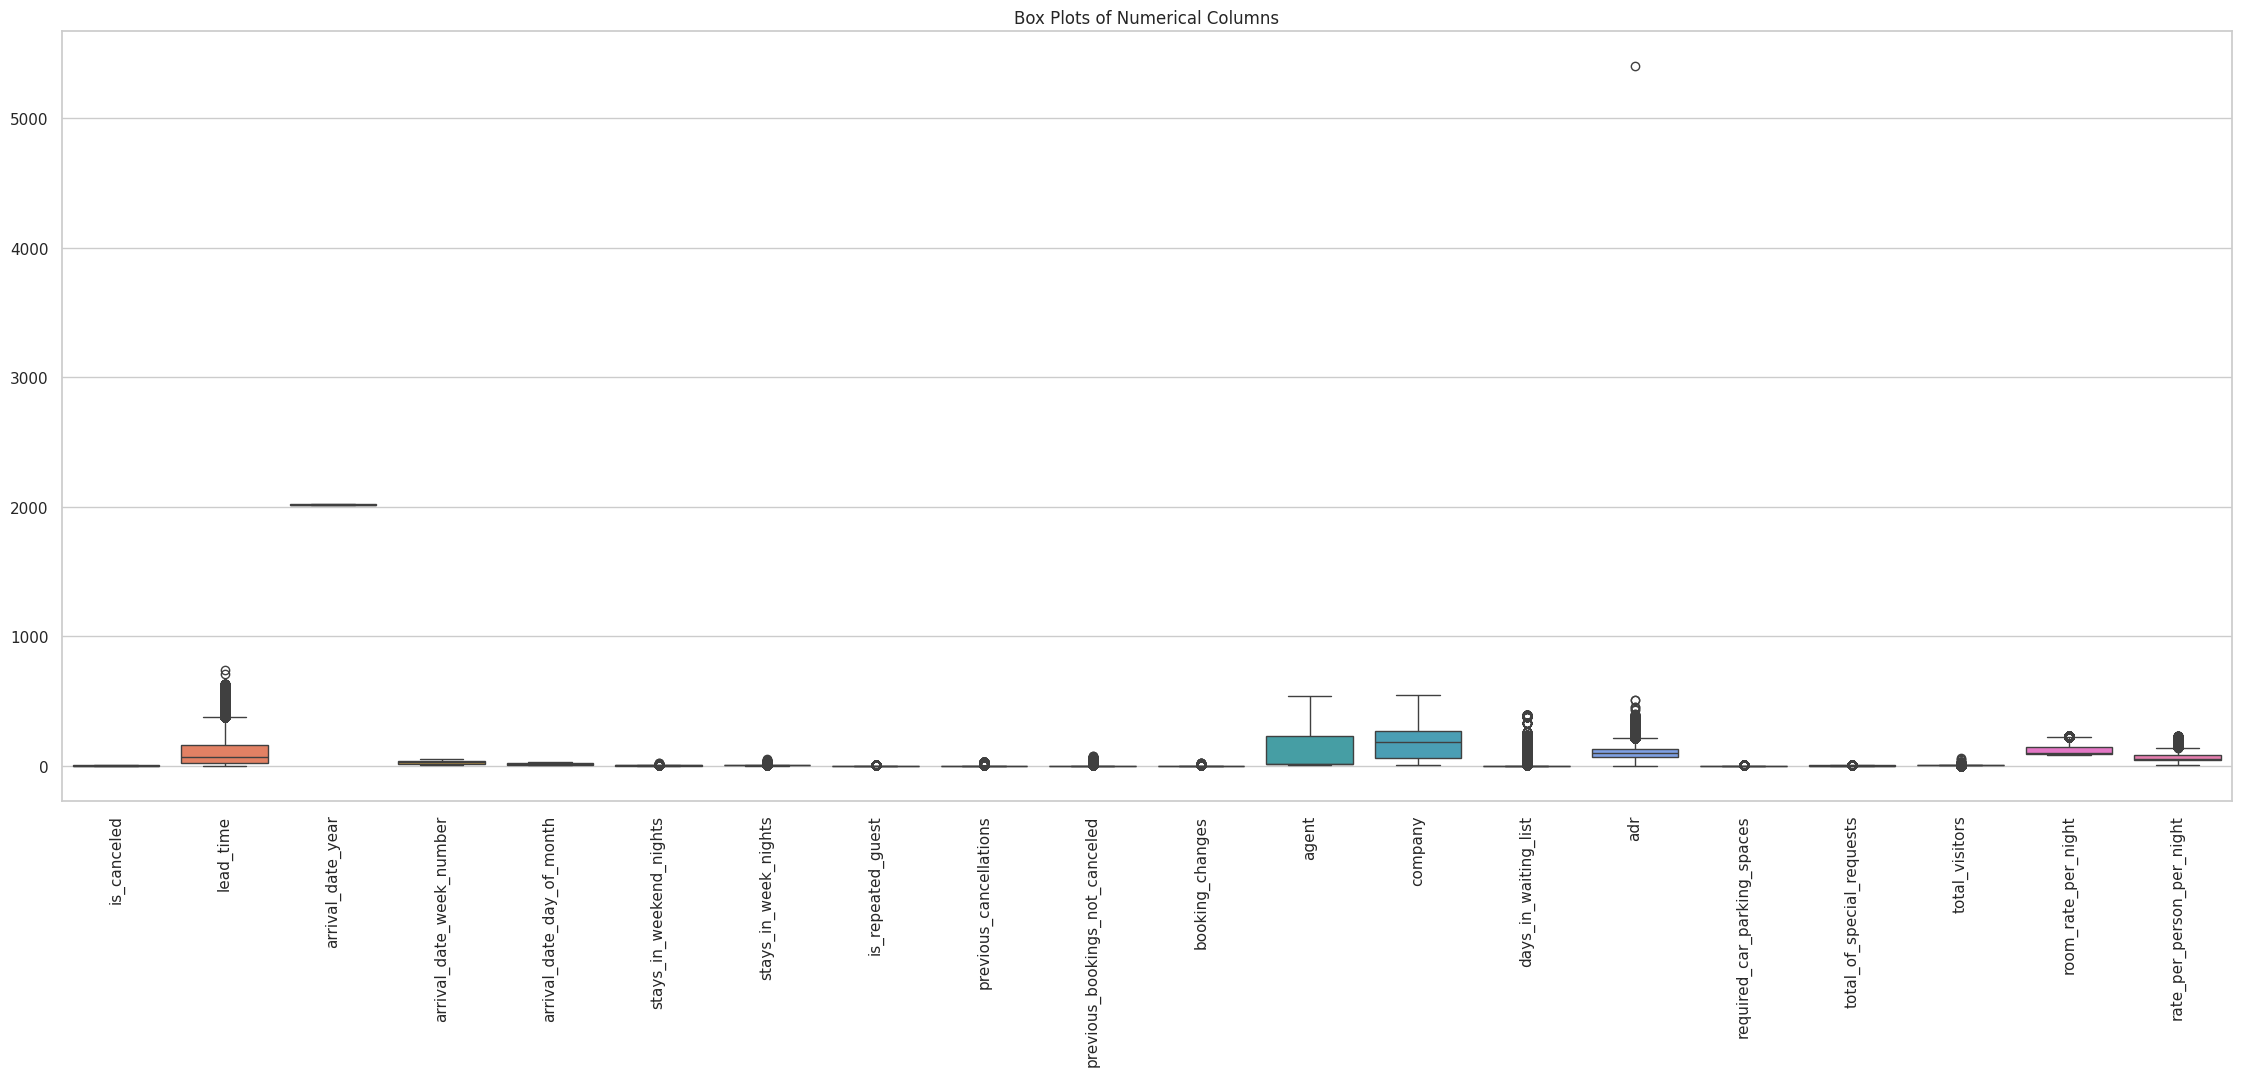


Skewness and Kurtosis:
Skewness:
is_canceled                        0.536678
lead_time                          1.346550
arrival_date_year                 -0.001894
arrival_date_week_number          -0.010014
arrival_date_day_of_month         -0.002000
stays_in_weekend_nights            1.380046
stays_in_week_nights               2.862249
is_repeated_guest                  5.326315
previous_cancellations            24.458049
previous_bookings_not_canceled    23.539800
booking_changes                    6.000270
agent                              1.090764
company                            0.600828
days_in_waiting_list              11.944353
adr                               10.530214
required_car_parking_spaces        4.163233
total_of_special_requests          1.349189
total_visitors                    10.154273
room_rate_per_night                1.290523
rate_per_person_per_night          1.611942
dtype: float64
Kurtosis:
is_canceled                         -1.712005
lead_time      

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('HotelBooking Datasets.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
summary_stats = df.describe()
print(summary_stats)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create histograms for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(bins=28, figsize=(28, 10), layout=(2, len(numerical_columns)//2))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

# Create box plots for numerical columns
plt.figure(figsize=(28, 10))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)
plt.title('Box Plots of Numerical Columns')
plt.show()

# Calculate skewness and kurtosis
print("\nSkewness and Kurtosis:")
skewness = df[numerical_columns].skew()
kurtosis = df[numerical_columns].kurtosis()

# Display skewness and kurtosis
print(f"Skewness:\n{skewness}")
print(f"Kurtosis:\n{kurtosis}")


2. PROBLEM STATEMENT



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('HotelBooking Datasets.csv')

# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values = missing_values[missing_values > 0]
print("Columns with missing values before imputation:\n", missing_values)


Columns with missing values before imputation:
 agent                          1168
company                        5575
required_car_parking_spaces       1
total_of_special_requests         1
reservation_status                1
reservation_status_date           1
total_visitors                    1
weekend_visitors                  1
room_rate_per_night               1
rate_per_person_per_night         1
booking_date                      1
guest_age_group                   1
booking_channel                   1
dtype: int64


In [ ]:
# Mean imputation for numerical columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Check for missing values after mean imputation
missing_values_mean = df.isnull().sum()
print("Columns with missing values after mean imputation:\n", missing_values_mean[missing_values_mean > 0])

# Reload the dataset for independent imputation steps
df = pd.read_csv('HotelBooking Datasets.csv')

# Median imputation for numerical columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].median(), inplace=True)

# Check for missing values after median imputation
missing_values_median = df.isnull().sum()
print("Columns with missing values after median imputation:\n", missing_values_median[missing_values_median > 0])

# Reload the dataset for independent imputation steps
df = pd.read_csv('HotelBooking Datasets.csv')

# Mode imputation for categorical columns
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Check for missing values after mode imputation
missing_values_mode = df.isnull().sum()
print("Columns with missing values after mode imputation:\n", missing_values_mode[missing_values_mode > 0])

# Reload the dataset for independent imputation steps
df = pd.read_csv('HotelBooking Datasets.csv')

# Forward fill
df.fillna(method='ffill', inplace=True)

# Check for missing values after forward fill
missing_values_ffill = df.isnull().sum()
print("Columns with missing values after forward fill:\n", missing_values_ffill[missing_values_ffill > 0])

# Reload the dataset for independent imputation steps
df = pd.read_csv('HotelBooking Datasets.csv')

# Backward fill
df.fillna(method='bfill', inplace=True)

# Check for missing values after backward fill
missing_values_bfill = df.isnull().sum()
print("Columns with missing values after backward fill:\n", missing_values_bfill[missing_values_bfill > 0])




Columns with missing values after mean imputation:
 reservation_status         1
reservation_status_date    1
weekend_visitors           1
booking_date               1
guest_age_group            1
booking_channel            1
dtype: int64
Columns with missing values after median imputation:
 reservation_status         1
reservation_status_date    1
weekend_visitors           1
booking_date               1
guest_age_group            1
booking_channel            1
dtype: int64
Columns with missing values after mode imputation:
 agent                          1168
company                        5575
required_car_parking_spaces       1
total_of_special_requests         1
total_visitors                    1
room_rate_per_night               1
rate_per_person_per_night         1
dtype: int64
Columns with missing values after forward fill:
 agent       3
company    18
dtype: int64
Columns with missing values after backward fill:
 company                        83
required_car_parking_spaces  

# **Phase 2: Data Ingestion Strategies (Months 4-5)**

3. PROBLEM STATEMENT

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_visitors',
       'weekend_visitors', 'room_rate_per_night', 'rate_per_person_per_night',
       'booking_date', 'guest_age_group', 'booking_channel'],
      dtype='object')


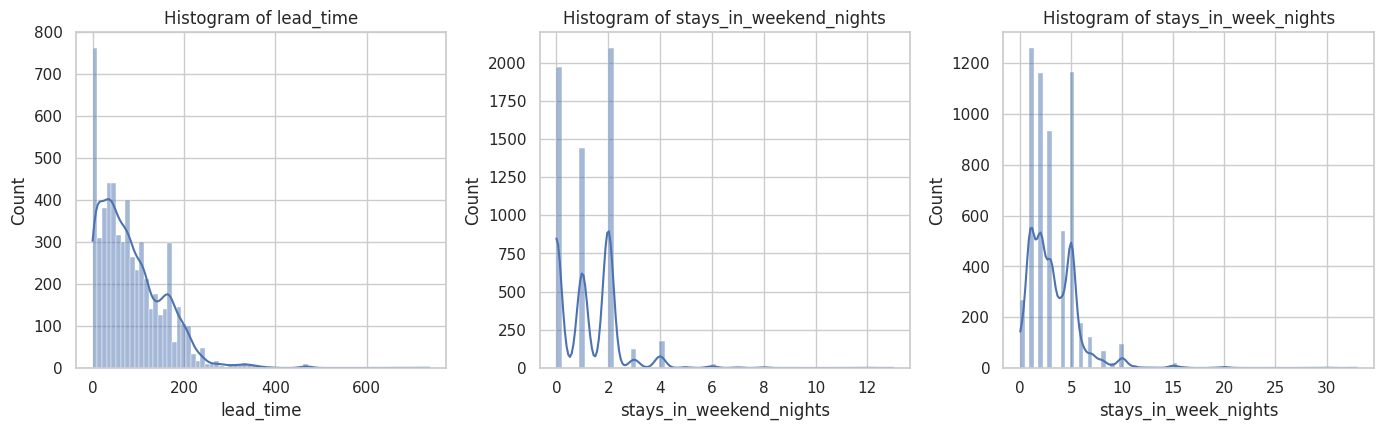

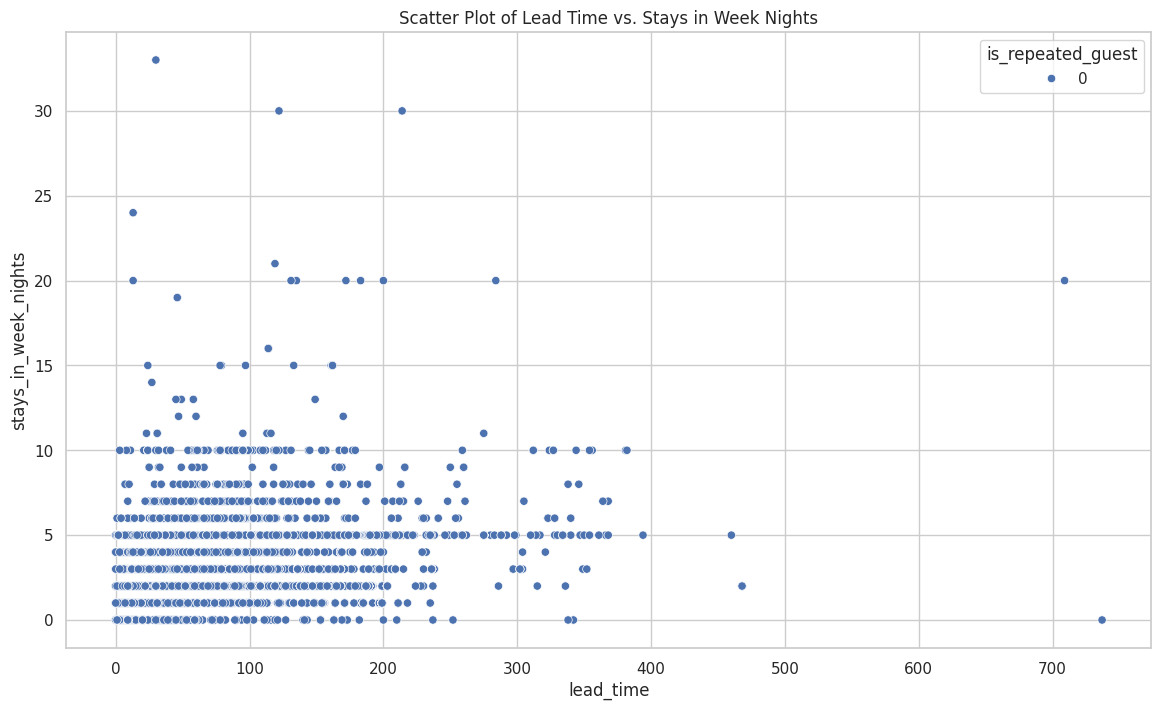

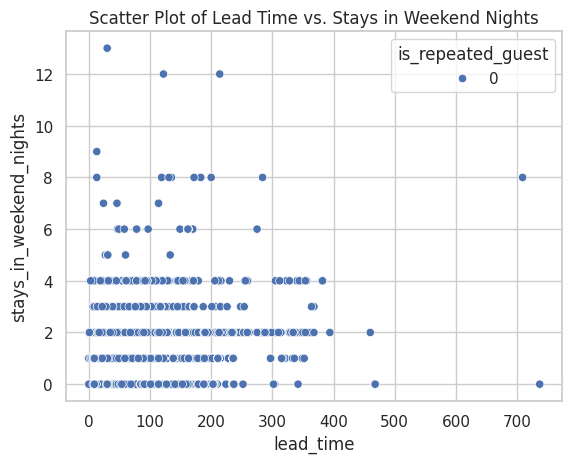

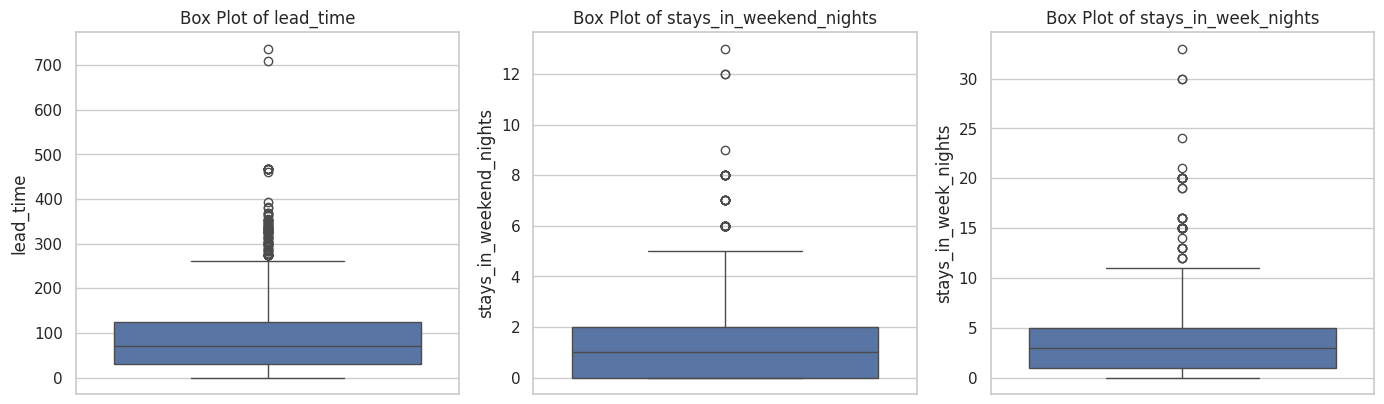

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('HotelBooking Datasets.csv')

# Display the column names
print(df.columns)

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Update key numerical attributes with the correct column names
key_numerical_attributes = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']

plt.figure(figsize=(14, 8))
for i, column in enumerate(key_numerical_attributes, 1):
    if column in df.columns:
        plt.subplot(2, 3, i)
        sns.histplot(df[column].dropna(), kde=True)  # Ensure compatibility
        plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


# Plot scatter plots to analyze relationships between key variables
if 'lead_time' in df.columns and 'stays_in_week_nights' in df.columns:
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=df, x='lead_time', y='stays_in_week_nights', hue='is_repeated_guest')
    plt.title('Scatter Plot of Lead Time vs. Stays in Week Nights')
    plt.show()

if 'lead_time' in df.columns and 'stays_in_weekend_nights' in df.columns:
    sns.scatterplot(data=df, x='lead_time', y='stays_in_weekend_nights', hue='is_repeated_guest')
    plt.title('Scatter Plot of Lead Time vs. Stays in Weekend Nights')
    plt.show()


# Plot box plots to detect outliers in key numerical attributes
plt.figure(figsize=(14, 8))
for i, column in enumerate(key_numerical_attributes, 1):
    if column in df.columns:
        plt.subplot(2, 3, i)
        sns.boxplot(data=df[column].dropna())
        plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()




4. PROBLEM STATEMENT

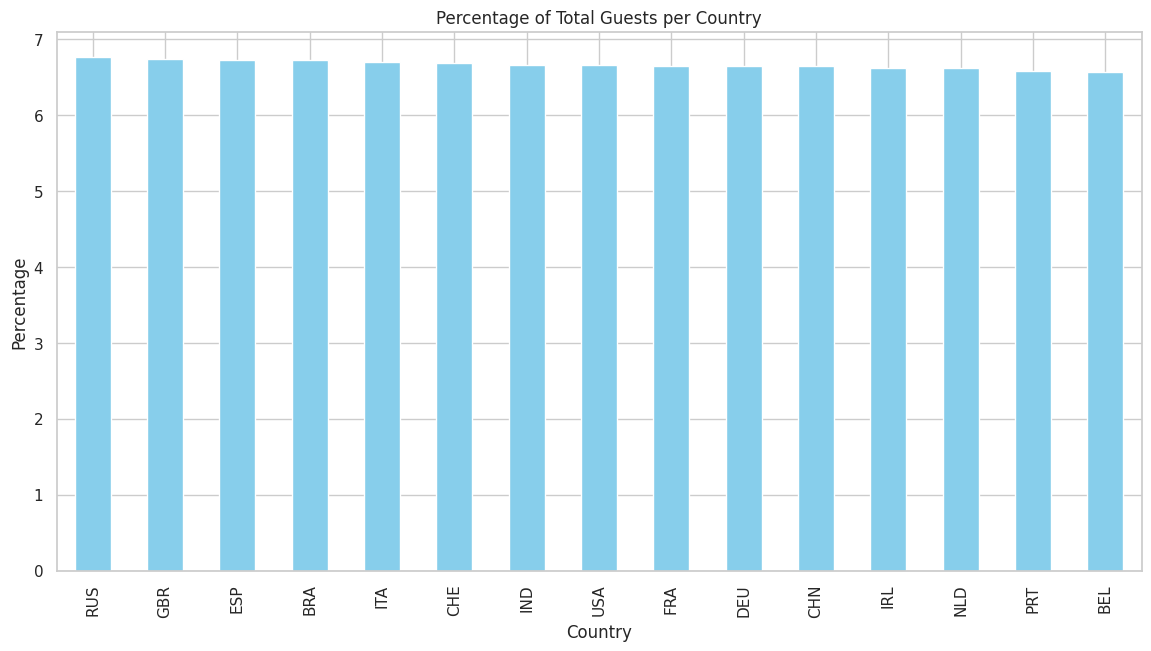

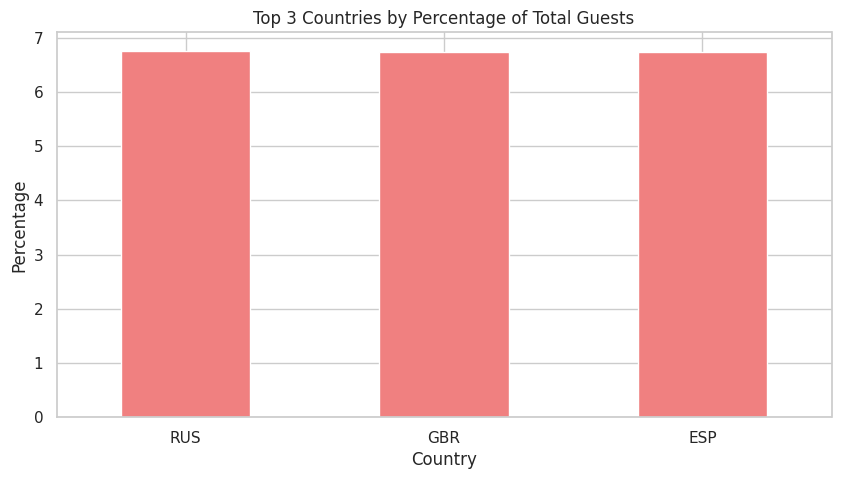

Detailed Report:
Total number of guests: 119390
Percentage of total guests per country:
country
RUS    6.76
GBR    6.74
ESP    6.73
BRA    6.72
ITA    6.70
CHE    6.69
IND    6.66
USA    6.66
FRA    6.65
DEU    6.65
CHN    6.65
IRL    6.62
NLD    6.62
PRT    6.58
BEL    6.57
Name: count, dtype: float64
Top 3 countries:
country
RUS    6.76
GBR    6.74
ESP    6.73
Name: count, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assume the dataset is named 'hotel_bookings.csv' and has a column 'country' indicating the guest's country
df = pd.read_csv('HotelBooking Datasets.csv')

# Calculate the number of guests per country
country_counts = df['country'].value_counts()

# Calculate the percentage of total guests per country
total_guests = country_counts.sum()
country_percentages = (country_counts / total_guests) * 100

# Round off the percentages to 2 decimal places
country_percentages = country_percentages.round(2)

# Identify the top 3 countries
top_3_countries = country_percentages.head(3)

# Plot the percentages for all countries
plt.figure(figsize=(14, 7))
country_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Total Guests per Country')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

# Highlight the top 3 countries in a separate plot
plt.figure(figsize=(10, 5))
top_3_countries.plot(kind='bar', color='lightcoral')
plt.title('Top 3 Countries by Percentage of Total Guests')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

# Print a detailed report
print("Detailed Report:")
print(f"Total number of guests: {total_guests}")
print("Percentage of total guests per country:")
print(country_percentages)
print("Top 3 countries:")
print(top_3_countries)


# **Phase 3: Data Transformation (Months 6-7)**

6. PROBLEM STATEMENT

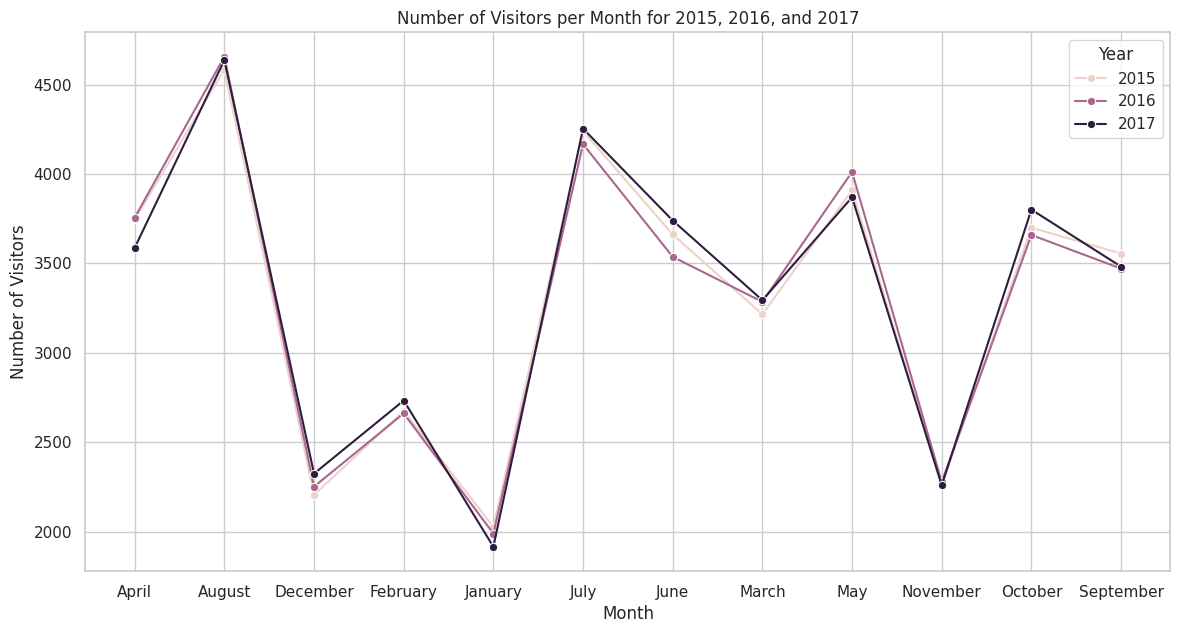

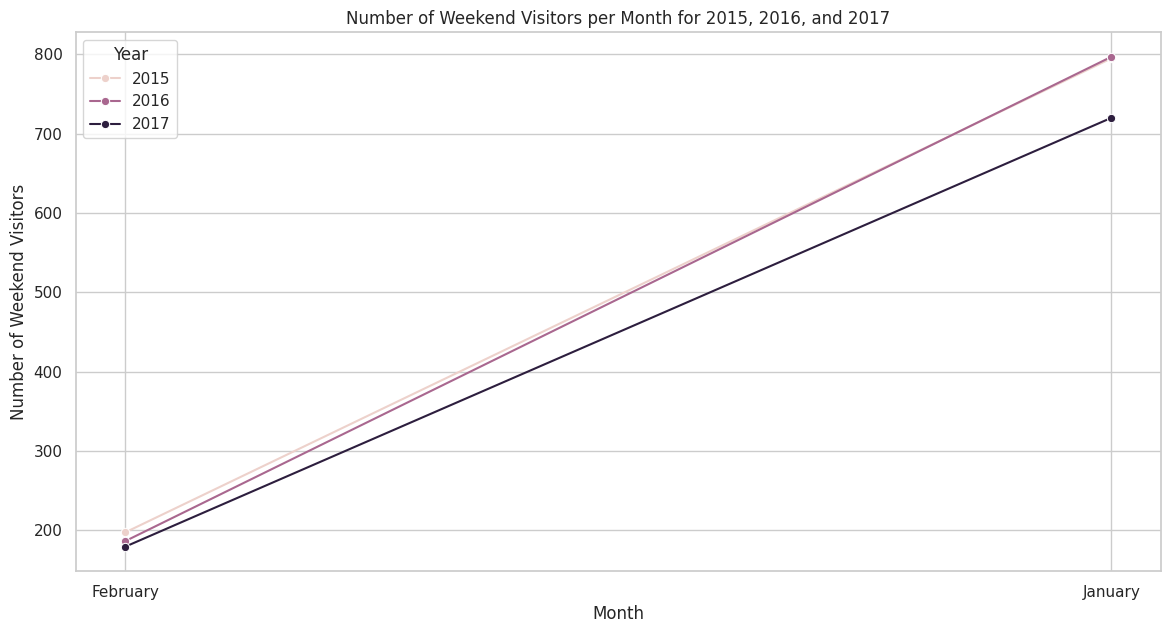

Detailed Report:
Total number of weekend visitors per year:
arrival_date_year
2015    992
2016    983
2017    899
Name: weekend_visitors, dtype: int64
The year with the most weekend bookings is 2015.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assume the dataset is named 'hotel_bookings.csv' and has columns 'arrival_date_year', 'arrival_date_month', 'is_weekend', and 'is_canceled'
df = pd.read_csv('HotelBooking Datasets.csv')

# Filter the data for the years 2015, 2016, and 2017
df = df[df['arrival_date_year'].isin([2015, 2016, 2017])]

# Create a new column to indicate weekend bookings (assuming weekends are Friday and Saturday)
df['is_weekend'] = df['arrival_date_week_number'].isin([4, 5])  # 4: Friday, 5: Saturday

# Aggregate data by month and year
monthly_visitors = df.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='visitors')
monthly_weekend_visitors = df[df['is_weekend']].groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='weekend_visitors')

# Plot the number of visitors per month for each year
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_visitors, x='arrival_date_month', y='visitors', hue='arrival_date_year', marker='o')
plt.title('Number of Visitors per Month for 2015, 2016, and 2017')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.legend(title='Year')
plt.show()

# Plot the number of weekend visitors per month for each year
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_weekend_visitors, x='arrival_date_month', y='weekend_visitors', hue='arrival_date_year', marker='o')
plt.title('Number of Weekend Visitors per Month for 2015, 2016, and 2017')
plt.xlabel('Month')
plt.ylabel('Number of Weekend Visitors')
plt.legend(title='Year')
plt.show()

# Identify which year had the most weekend bookings
total_weekend_visitors = monthly_weekend_visitors.groupby('arrival_date_year')['weekend_visitors'].sum()
most_weekend_bookings_year = total_weekend_visitors.idxmax()

# Print a detailed report
print("Detailed Report:")
print("Total number of weekend visitors per year:")
print(total_weekend_visitors)
print(f"The year with the most weekend bookings is {most_weekend_bookings_year}.")


# **Phase 4: Data Warehousing (Months 8-9)**

7. PROBLEM STATEMENT

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2016               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2017               July   
4  Resort Hotel            0         14               2016               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights meal  ...  \
0                        0                     0   BB  ...   
1                        0              

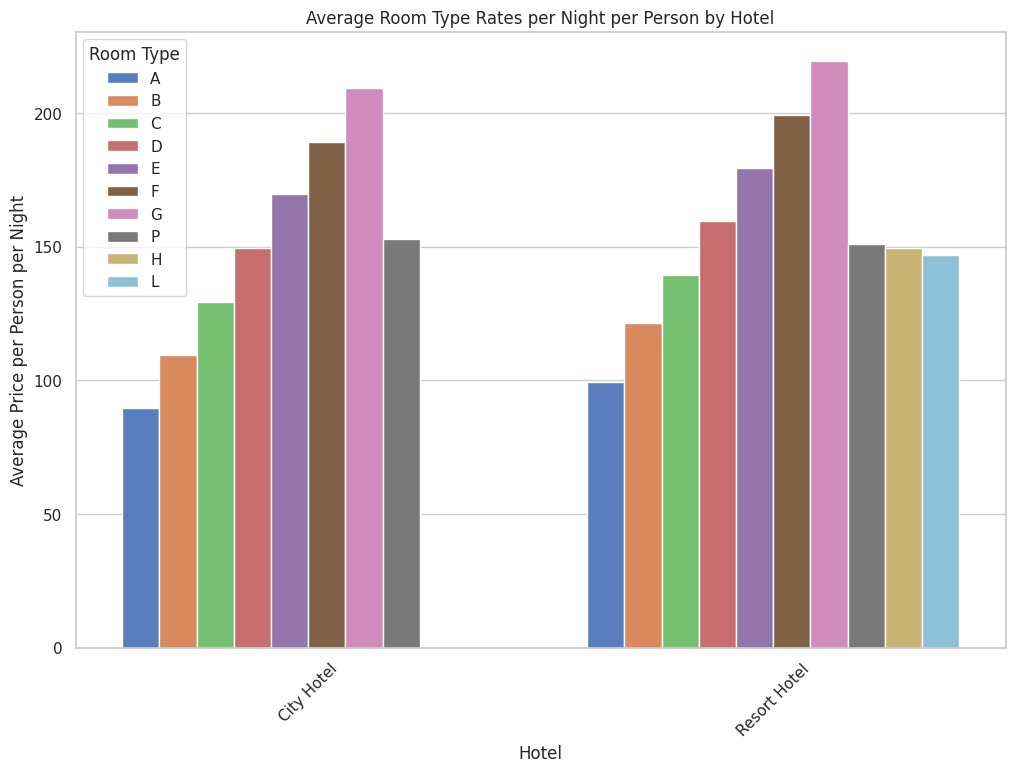

<ipython-input-22-228c4df25b86>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  country_plot = sns.barplot(x='country', y='room_rate_per_night', data=average_price_country, palette='muted')


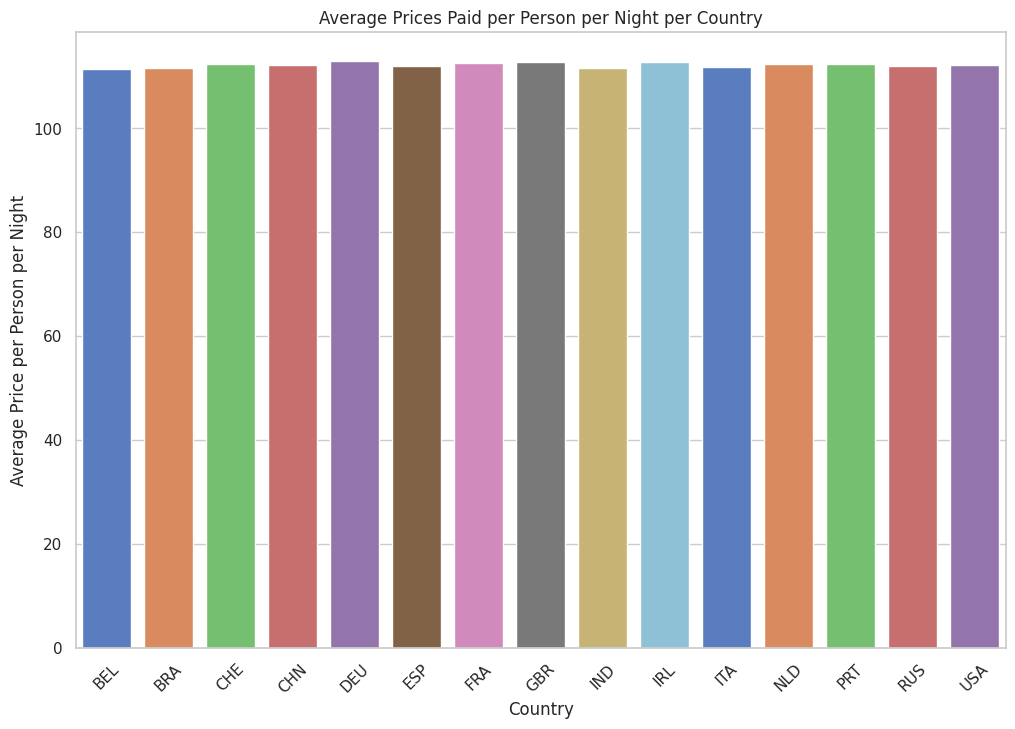

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'HotelBooking Datasets.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
print(data.head())

# Check for missing values and data types
print(data.info())

# Display summary statistics
print(data.describe())

# Calculate the average price per person per night by hotel and room type
average_price_hotel = data.groupby(['hotel', 'reserved_room_type'])['room_rate_per_night'].mean().reset_index()

# Calculate the average price per person per night by country
average_price_country = data.groupby(['country'])['room_rate_per_night'].mean().reset_index()

# Set up the plotting environment
sns.set(style="whitegrid")

# Bar plot for average room type rates per night per person by hotel
plt.figure(figsize=(12, 8))
hotel_plot = sns.barplot(x='hotel', y='room_rate_per_night', hue='reserved_room_type', data=average_price_hotel, palette='muted')
hotel_plot.set_title('Average Room Type Rates per Night per Person by Hotel')
hotel_plot.set_xlabel('Hotel')
hotel_plot.set_ylabel('Average Price per Person per Night')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

# Bar plot for average prices paid per person per night per country
plt.figure(figsize=(12, 8))
country_plot = sns.barplot(x='country', y='room_rate_per_night', data=average_price_country, palette='muted')
country_plot.set_title('Average Prices Paid per Person per Night per Country')
country_plot.set_xlabel('Country')
country_plot.set_ylabel('Average Price per Person per Night')
plt.xticks(rotation=45)
plt.show()


8. PROBLEM STATEMENT


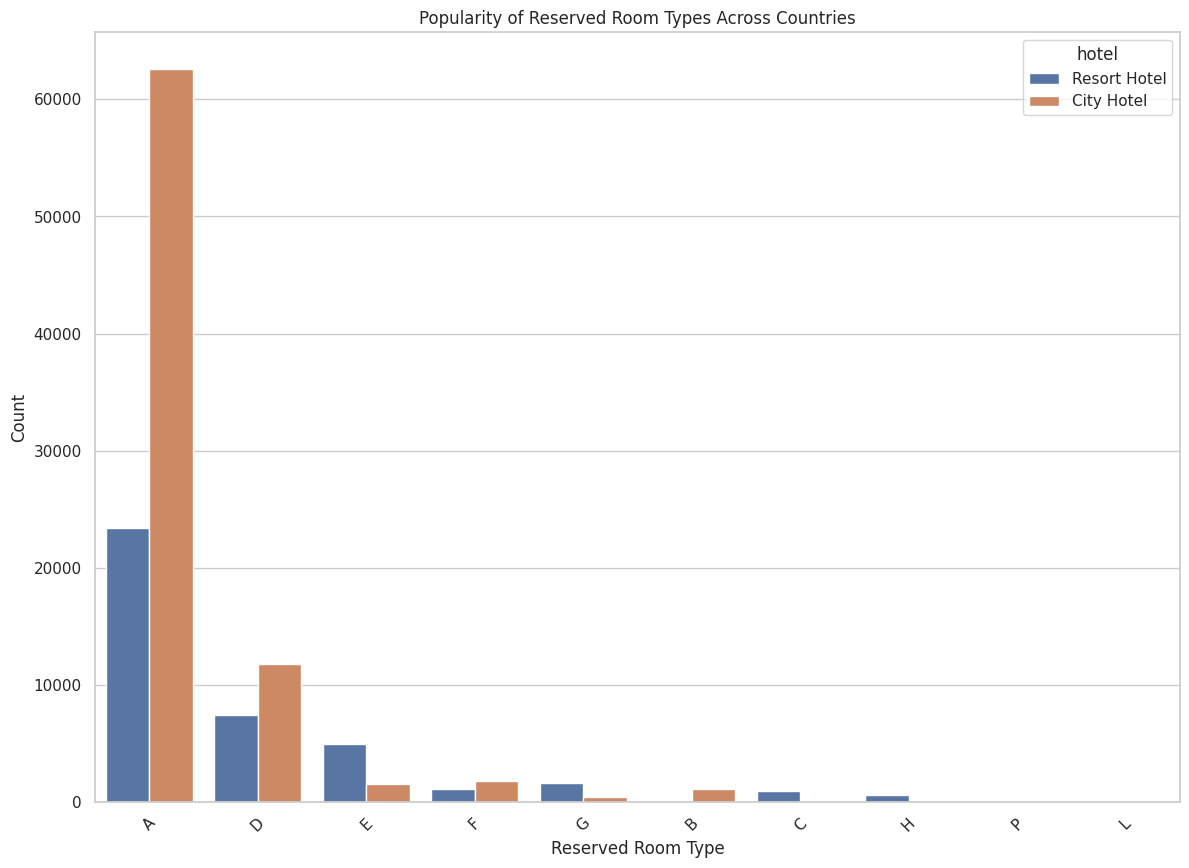

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'HotelBooking Datasets.csv'
data = pd.read_csv(file_path)

# Count the number of reservations for each room type across countries
room_type_counts = data.groupby(['country', 'reserved_room_type', 'hotel']).size().reset_index(name='counts')

# Set up the plotting environment
sns.set(style="whitegrid")

# Countplot for room type popularity across countries with hue set to hotel
plt.figure(figsize=(14, 10))
countplot = sns.countplot(data=data, x='reserved_room_type', order=data['reserved_room_type'].value_counts().index, hue='hotel')
countplot.set_title('Popularity of Reserved Room Types Across Countries')
countplot.set_xlabel('Reserved Room Type')
countplot.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# **Phase 5: Reporting and Visualization (Months 10-12)**

9. PROBLEM STATEMENT


Missing values before dropping: hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              21464
company                           112937
days_in_waiting_list                   0
customer_type            

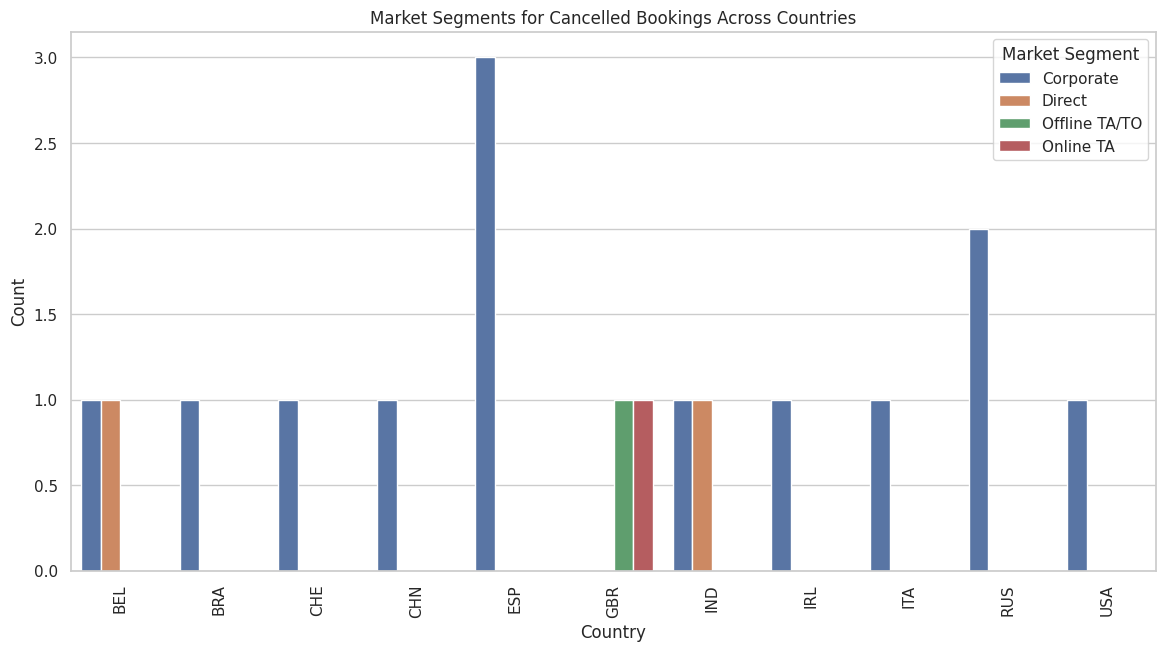

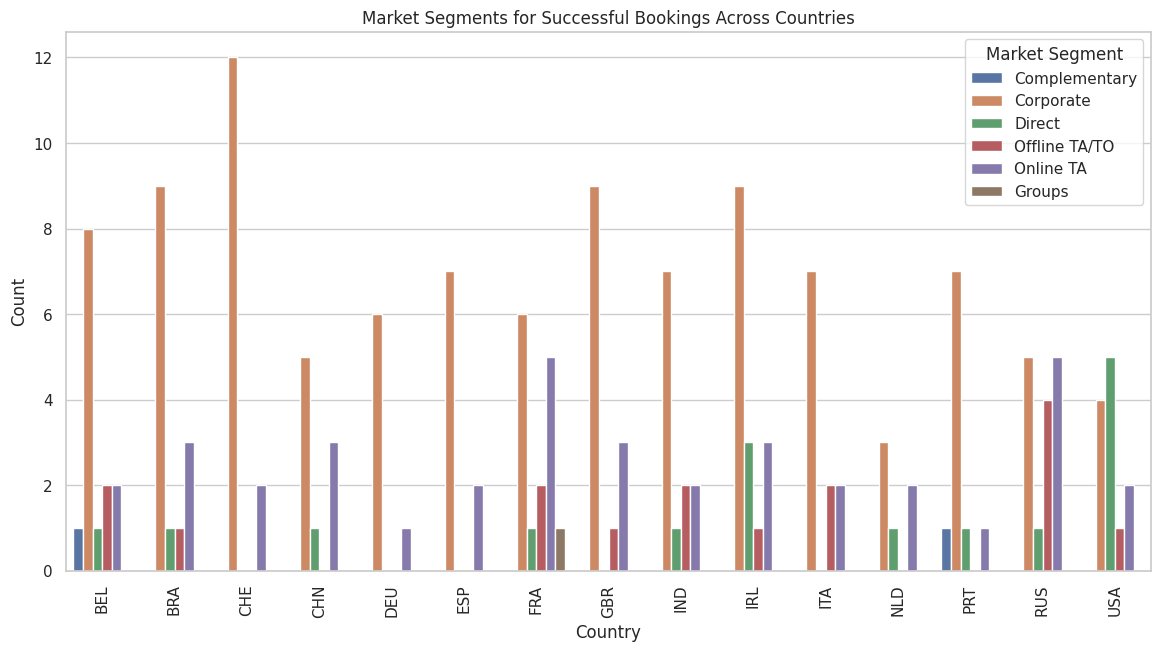

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = 'HotelBooking Datasets.csv'
hotel_data = pd.read_csv(file_path)

# Preprocess the data
# Check for missing values
missing_values = hotel_data.isnull().sum()
print("Missing values before dropping:", missing_values)

# Drop rows with missing values if any
hotel_data.dropna(inplace=True)

# Check the data types
print("Data types:\n", hotel_data.dtypes)

# Analyze the data
# Group the data by country, market segment, and booking status
grouped_data = hotel_data.groupby(['country', 'market_segment', 'is_canceled']).size().reset_index(name='count')

# Separate data for cancelled and successful bookings
cancelled_bookings = grouped_data[grouped_data['is_canceled'] == 1]
successful_bookings = grouped_data[grouped_data['is_canceled'] == 0]

# Visualize the data
# Set the style of the visualizations
sns.set(style='whitegrid')

# Plot for cancelled bookings
plt.figure(figsize=(14, 7))
sns.barplot(data=cancelled_bookings, x='country', y='count', hue='market_segment')
plt.title('Market Segments for Cancelled Bookings Across Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Market Segment')
plt.xticks(rotation=90)
plt.show()

# Plot for successful bookings
plt.figure(figsize=(14, 7))
sns.barplot(data=successful_bookings, x='country', y='count', hue='market_segment')
plt.title('Market Segments for Successful Bookings Across Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Market Segment')
plt.xticks(rotation=90)
plt.show()

10. PROBLEM STATEMENT

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2016               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2017               July   
4  Resort Hotel            0         14               2016               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights meal  ...  \
0                        0                     0   BB  ...   
1                        0              

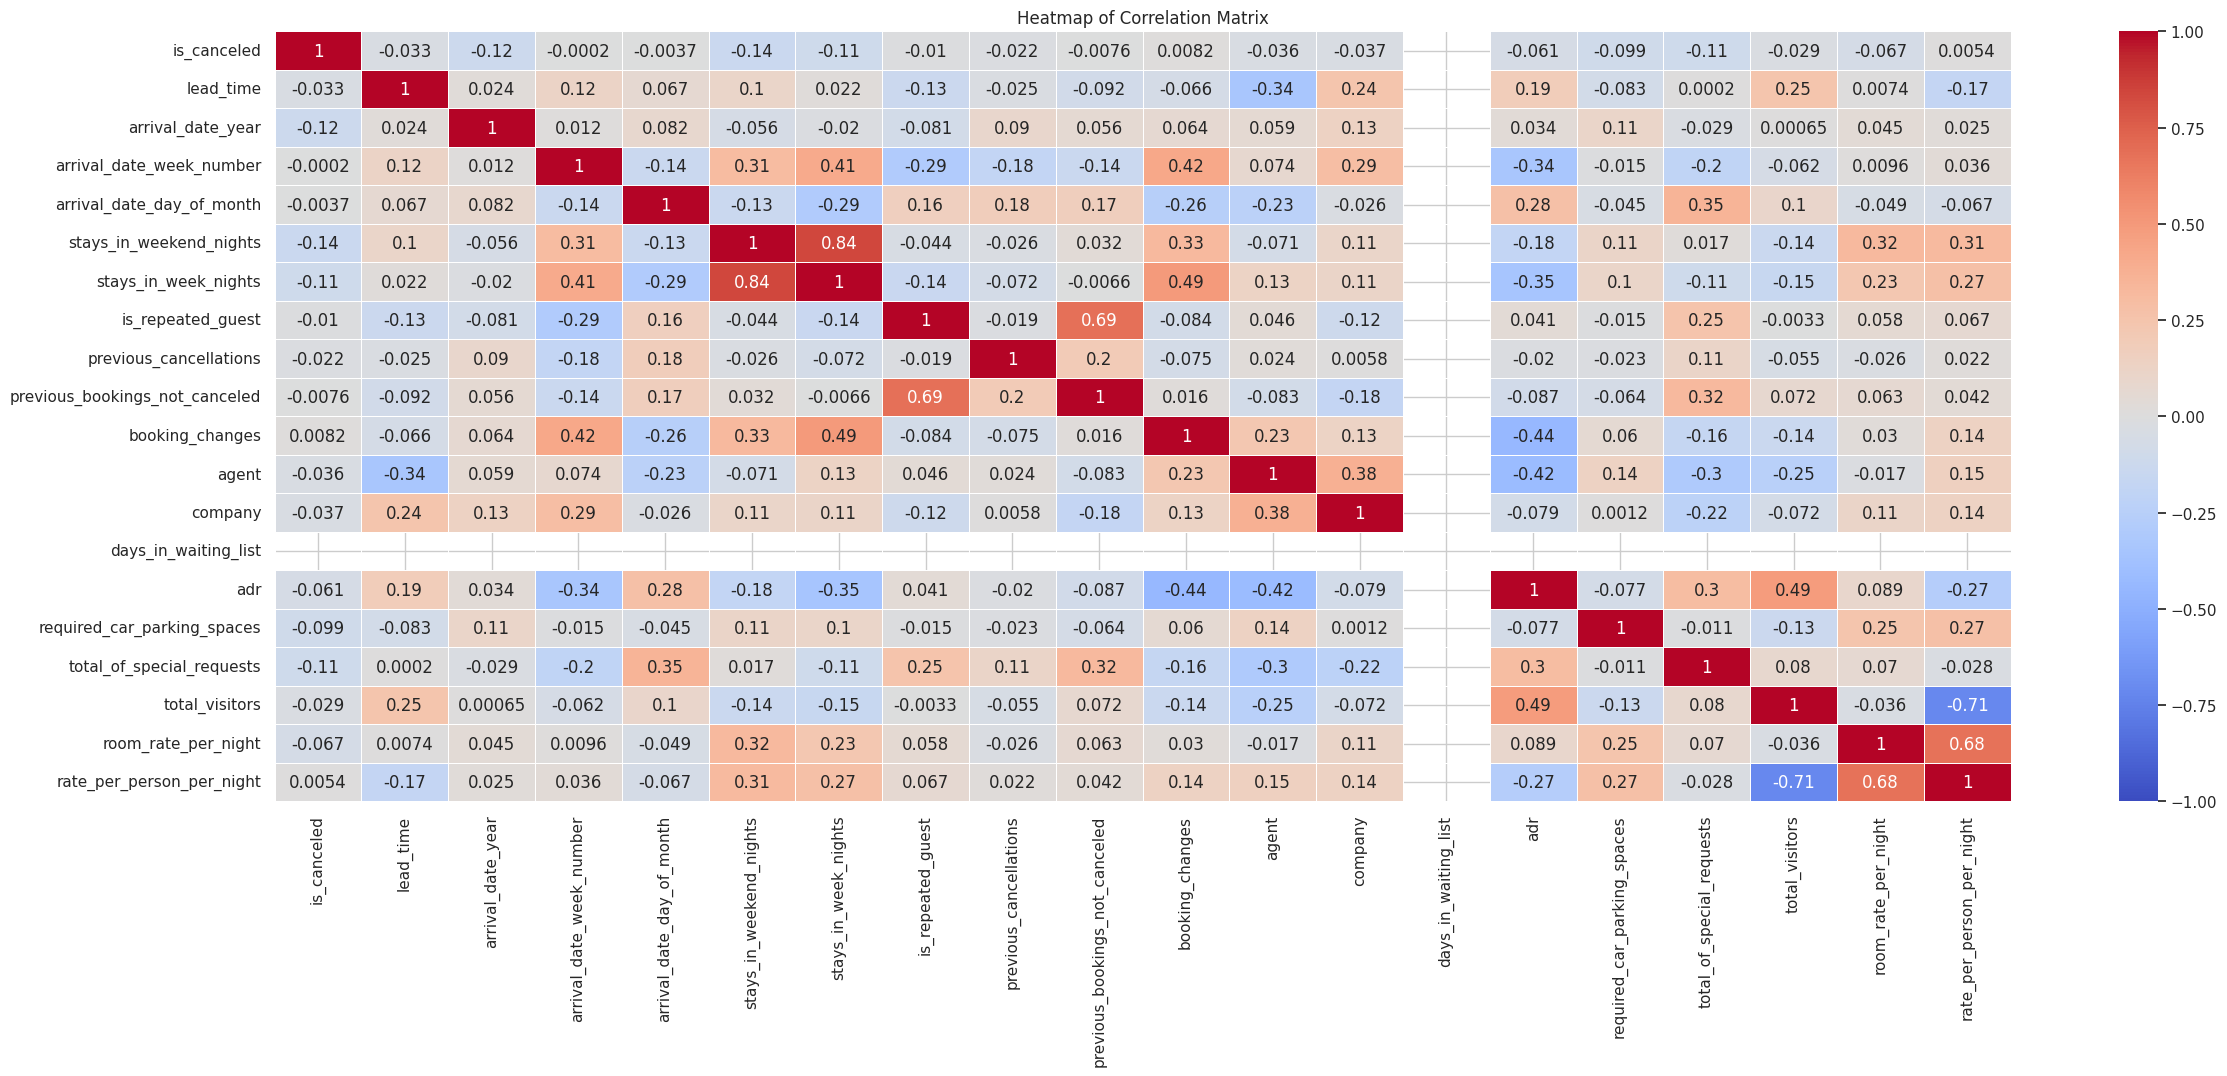

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = 'HotelBooking Datasets.csv'
hotel_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(hotel_data.head())

# Check for missing values
missing_values = hotel_data.isnull().sum()
print("Missing values before dropping:", missing_values)

# Drop rows with missing values if any
hotel_data.dropna(inplace=True)

# Select numerical columns for correlation analysis
numerical_cols = hotel_data.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:\n", numerical_cols)

# Compute the correlation matrix
correlation_matrix = hotel_data[numerical_cols].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Set the size of the heatmap
plt.figure(figsize=(28, 10))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()




11.PROBLEM STATEMENT

Initial Data:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2016               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2017               July   
4  Resort Hotel            0         14               2016               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights meal  ...  \
0                        0                     0   BB  ...   
1                        0

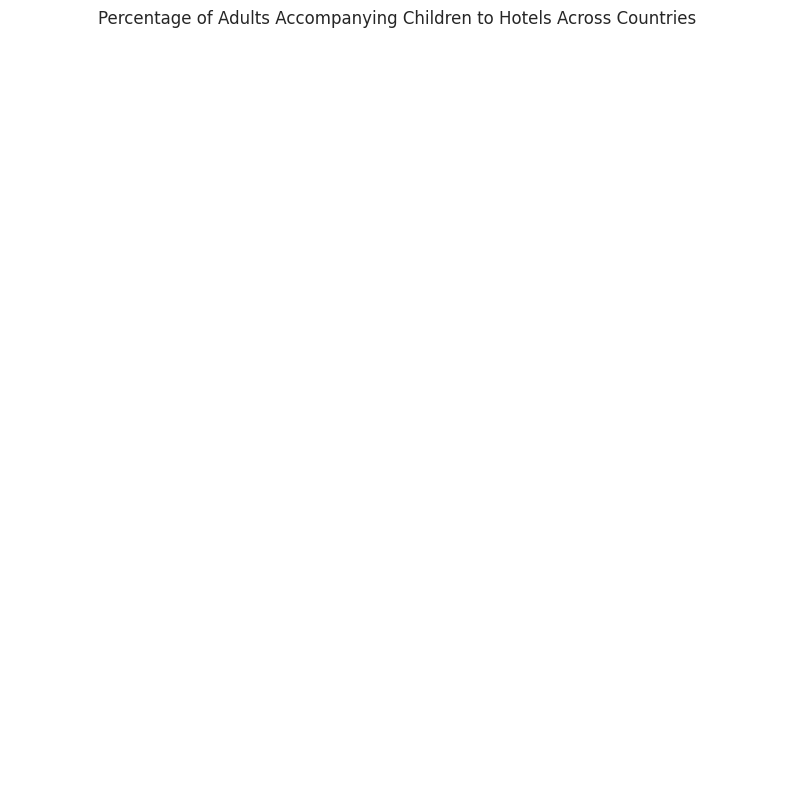

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'HotelBooking Datasets.csv'
hotel_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Initial Data:")
print(hotel_data.head())

# Check for missing values
missing_values = hotel_data.isnull().sum()
print("\nMissing values before dropping:")
print(missing_values)

# Drop rows with missing values if any
hotel_data.dropna(inplace=True)

# Display unique values in guest_age_group
print("\nUnique values in guest_age_group:")
print(hotel_data['guest_age_group'].unique())

# Classify age groups
def classify_age_group(age_group):
    children_groups = ['0-10', '11-18']
    return 'Child' if age_group in children_groups else 'Adult'

hotel_data['age_group_classification'] = hotel_data['guest_age_group'].apply(classify_age_group)

# Display the first few rows to check the new classification
print("\nData with age group classification:")
print(hotel_data.head())

# Filter rows where there are children
children_data = hotel_data[hotel_data['age_group_classification'] == 'Child']
print("\nChildren data:")
print(children_data.head())

# Calculate the total number of bookings with children for each country
total_bookings_with_children = children_data.groupby('country').size()
print("\nTotal bookings with children:")
print(total_bookings_with_children)

# Calculate the total number of adults accompanying children for each country
adults_with_children_data = hotel_data[(hotel_data['age_group_classification'] == 'Adult') & (hotel_data['country'].isin(total_bookings_with_children.index))]
total_adults_with_children = adults_with_children_data.groupby('country').size()
print("\nTotal adults accompanying children:")
print(total_adults_with_children)

# Calculate the percentage of adults accompanying children for each country
percentage_adults_with_children = (total_adults_with_children / total_bookings_with_children) * 100
print("\nPercentage of adults accompanying children:")
print(percentage_adults_with_children)

# Convert to a DataFrame
percentage_adults_with_children = percentage_adults_with_children.reset_index()
percentage_adults_with_children.columns = ['country', 'percentage']

# Display the result
print("\nPercentage of adults with children DataFrame:")
print(percentage_adults_with_children)

# Sort the data for better visualization
percentage_adults_with_children = percentage_adults_with_children.sort_values(by='percentage', ascending=False)

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(percentage_adults_with_children['percentage'], labels=percentage_adults_with_children['country'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(percentage_adults_with_children)))
plt.title('Percentage of Adults Accompanying Children to Hotels Across Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2016               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2017               July   
4  Resort Hotel            0         14               2016               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights meal  ...  \
0                        0                     0   BB  ...   
1                        0              

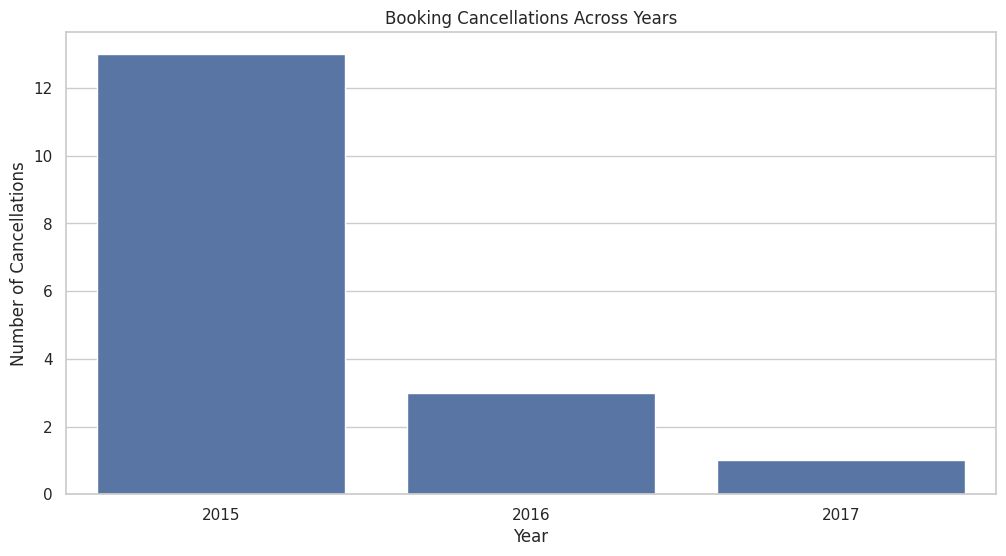

<ipython-input-33-a6ef2dc078de>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_cancellations.index, y=country_cancellations.values, palette='viridis')


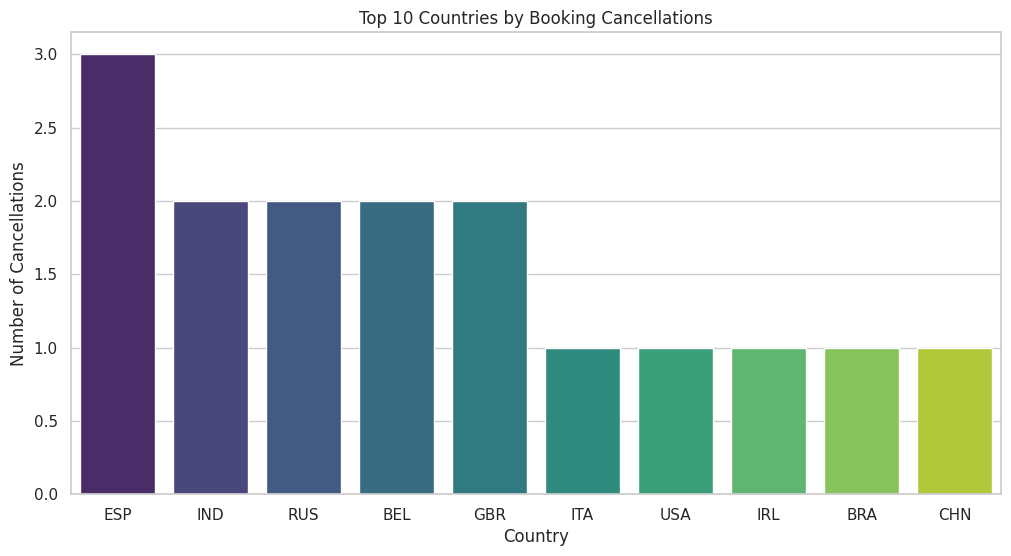

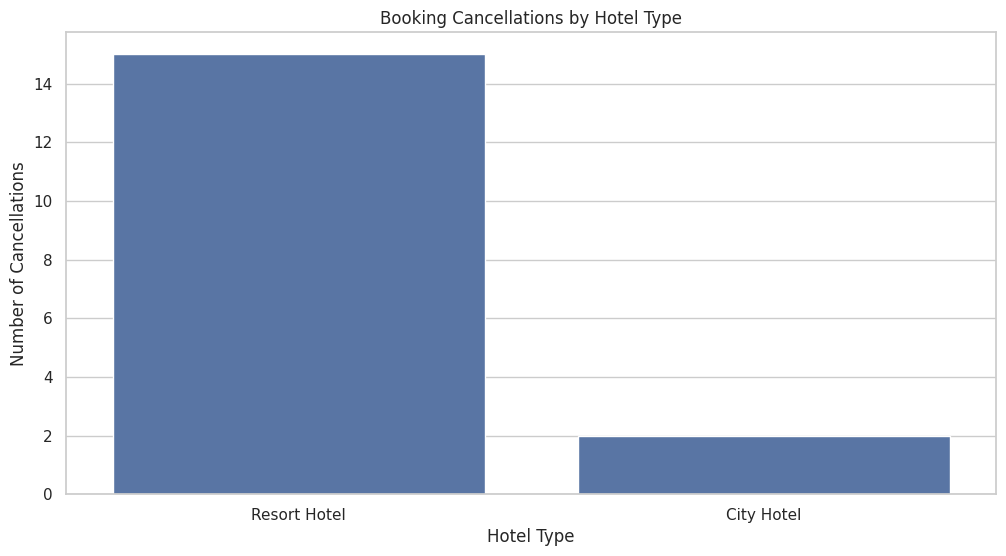

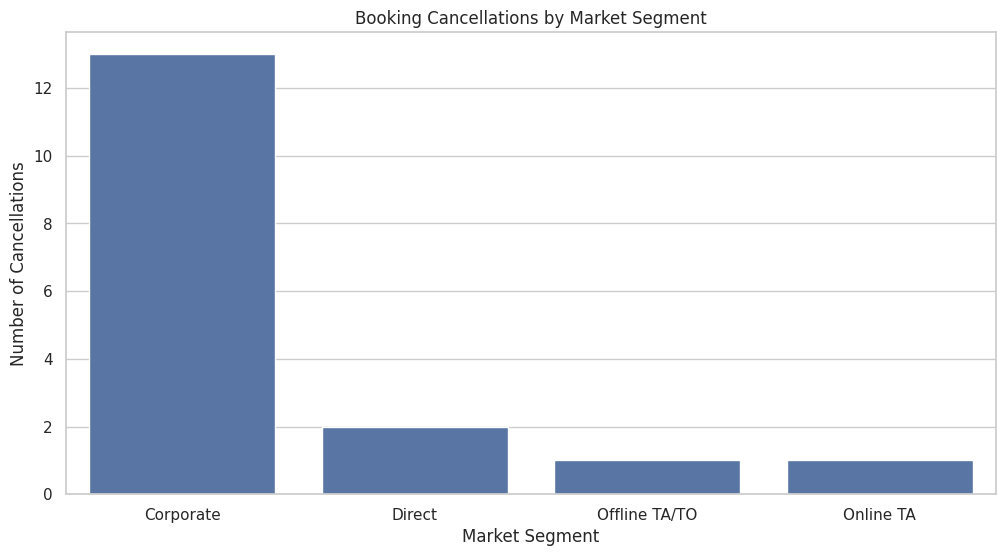

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'HotelBooking Datasets.csv'
hotel_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(hotel_data.head())

# Check for missing values
missing_values = hotel_data.isnull().sum()
print("\nMissing values before dropping:")
print(missing_values)

# Drop rows with missing values if any
hotel_data.dropna(inplace=True)

# Display the first few rows after preprocessing
print("\nData after preprocessing:")
print(hotel_data.head())

# Convert 'reservation_status_date' to datetime
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])

# Extract year from 'reservation_status_date'
hotel_data['year'] = hotel_data['reservation_status_date'].dt.year

# Plot cancellations across years
plt.figure(figsize=(12, 6))
sns.countplot(data=hotel_data[hotel_data['is_canceled'] == 1], x='year')
plt.title('Booking Cancellations Across Years')
plt.xlabel('Year')
plt.ylabel('Number of Cancellations')
plt.show()

# Plot cancellations across countries
plt.figure(figsize=(12, 6))
country_cancellations = hotel_data[hotel_data['is_canceled'] == 1]['country'].value_counts().head(10)  # top 10 countries
sns.barplot(x=country_cancellations.index, y=country_cancellations.values, palette='viridis')
plt.title('Top 10 Countries by Booking Cancellations')
plt.xlabel('Country')
plt.ylabel('Number of Cancellations')
plt.show()

# Plot cancellations by hotel type
plt.figure(figsize=(12, 6))
sns.countplot(data=hotel_data[hotel_data['is_canceled'] == 1], x='hotel')
plt.title('Booking Cancellations by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Cancellations')
plt.show()

# Plot cancellations by market segment
plt.figure(figsize=(12, 6))
sns.countplot(data=hotel_data[hotel_data['is_canceled'] == 1], x='market_segment')
plt.title('Booking Cancellations by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Cancellations')
plt.show()


TypeError: Invalid object type at position 0

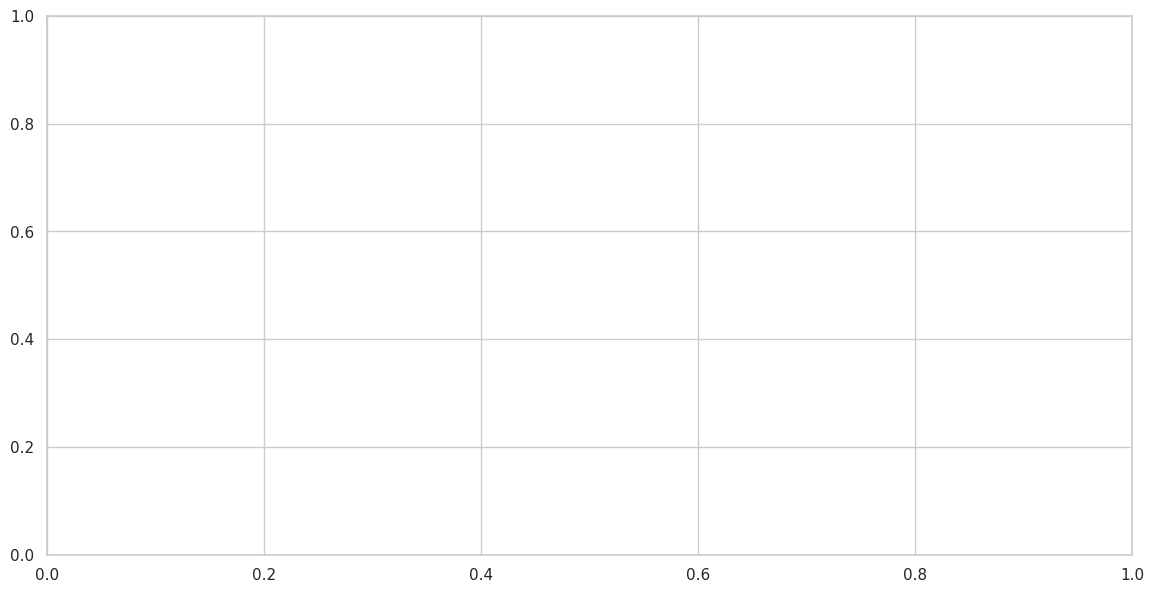

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('HotelBooking Datasets.csv')

# Convert date columns to datetime objects
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str), errors='coerce')

# Aggregate data by month and year
df['month_year'] = df['arrival_date'].dt.to_period('M')
monthly_visitors = df.groupby('month_year')['total_visitors'].sum().reset_index()

# Plot seasonal trends
plt.figure(figsize=(14, 7))
sns.lineplot(x='month_year', y='total_visitors', data=monthly_visitors, marker='o')
plt.xticks(rotation=90)
plt.title('Monthly Visitors Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Visitors')
plt.tight_layout()
plt.show()

# Identify peak and off-peak seasons
monthly_visitors['month'] = monthly_visitors['month_year'].dt.month
monthly_avg_visitors = monthly_visitors.groupby('month')['total_visitors'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_visitors', data=monthly_avg_visitors, palette='viridis')
plt.title('Average Monthly Visitors')
plt.xlabel('Month')
plt.ylabel('Average Total Visitors')
plt.tight_layout()
plt.show()

# Identify the months with the highest and lowest average visitors
peak_season = monthly_avg_visitors.loc[monthly_avg_visitors['total_visitors'].idxmax()]
off_peak_season = monthly_avg_visitors.loc[monthly_avg_visitors['total_visitors'].idxmin()]

print(f"Peak season is in month: {peak_season['month']} with an average of {peak_season['total_visitors']} visitors.")
print(f"Off-peak season is in month: {off_peak_season['month']} with an average of {off_peak_season['total_visitors']} visitors.")

# Discuss Strategic Planning and Pricing Strategies
strategic_planning = f"""
Based on the seasonal trends, we can implement the following strategies:
1. Peak Season (e.g., {peak_season['month']}):
   - Increase room rates to maximize revenue.
   - Offer special packages and promotions to attract more bookings.
   - Ensure sufficient staff and resources to handle the high demand.

2. Off-Peak Season (e.g., {off_peak_season['month']}):
   - Offer discounts and special deals to attract more visitors.
   - Focus on marketing campaigns to promote the hotel during these months.
   - Use this time for maintenance and staff training.

3. General Strategies:
   - Monitor booking trends and adjust pricing dynamically.
   - Leverage data analytics to forecast demand and optimize inventory.
   - Enhance customer loyalty programs to encourage repeat bookings.
"""
print(strategic_planning)
